In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
import os
from glob import glob
from skimage import color
import cv2
from PIL import Image
import tqdm
import keras
from keras.layers import Input, Lambda
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_path = './Original Dataset/Train'
valid_path = './Original Dataset/Test '

In [5]:
# useful for getting number of output classes
folders = glob('./Original Dataset/Train/*')

In [6]:
len(folders)

12

In [7]:
input_shape=(227,227,3)

np.random.seed(1000)

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())

# 1st Fully Connected Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# # 2nd  Fully Connected Dense Layer
# model.add(Dense(4096))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

#  Fully Connected Output Layer

model.add(Dense(12))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adamax(1e-4),  #Adamax , RMSprop , Adagrad, 
              loss='categorical_crossentropy',
              metrics=['accuracy','AUC','Precision','Recall'])

print("model compiled")
print(model.summary())

model compiled
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 1

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator( rescale=1 / 255.0,
                                    rotation_range=20,
                                    zoom_range=0.05,
                                    width_shift_range=0.05,
                                    height_shift_range=0.05,
                                    shear_range=0.05,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    brightness_range=[0.8,1.0],
                                    fill_mode="constant",
                                    validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)


In [81]:
train_generator = train_datagen.flow_from_directory(directory='./Original Dataset/Train/',
                                                    target_size=(227, 227),
                                                    color_mode="rgb",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=42)

Found 3803 images belonging to 12 classes.


In [82]:
len(train_generator)

119

In [83]:
validation_generator = train_datagen.flow_from_directory(directory='./Original Dataset/Train/',
                                                    target_size=(227, 227),
                                                    color_mode="rgb",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    subset='validation',
                                                    shuffle=False,
                                                    seed=42)

Found 947 images belonging to 12 classes.


In [84]:
len(validation_generator)

30

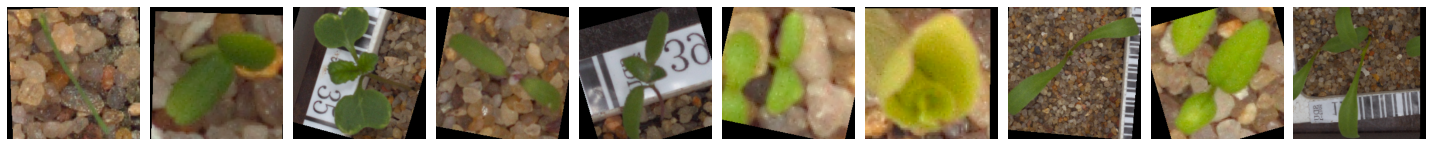

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.

In [85]:
imgs ,labels = next(train_generator)
from matplotlib import pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [86]:
print(train_generator.class_indices)
print("\n")
print(validation_generator.class_indices)

{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


In [87]:
# #Add checkpoints 
# from keras.callbacks import ModelCheckpoint
# #filepath='saved_models/models.h5'
# filepath="./FirevsNonFire_AlexNet_transfer_learning_model_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [93]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
early = [EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto'),ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)]
history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              epochs = 15, callbacks=early)                              

Epoch 1/15
119/119 [==============================] - 291s 2s/step - loss: 0.3967 - accuracy: 0.8567 - auc: 0.9910 - precision: 0.8785 - recall: 0.8349 - val_loss: 0.5118 - val_accuracy: 0.8532 - val_auc: 0.9832 - val_precision: 0.8797 - val_recall: 0.8342
Epoch 2/15
119/119 [==============================] - 312s 3s/step - loss: 0.3766 - accuracy: 0.8672 - auc: 0.9916 - precision: 0.8863 - recall: 0.8483 - val_loss: 0.4508 - val_accuracy: 0.8553 - val_auc: 0.9872 - val_precision: 0.8710 - val_recall: 0.8416
Epoch 3/15
119/119 [==============================] - 318s 3s/step - loss: 0.3574 - accuracy: 0.8722 - auc: 0.9923 - precision: 0.8919 - recall: 0.8527 - val_loss: 0.6004 - val_accuracy: 0.8279 - val_auc: 0.9785 - val_precision: 0.8508 - val_recall: 0.8131
Epoch 4/15
119/119 [==============================] - 299s 3s/step - loss: 0.3700 - accuracy: 0.8669 - auc: 0.9921 - precision: 0.8866 - recall: 0.8488 - val_loss: 0.6237 - val_accuracy: 0.8110 - val_auc: 0.9792 - val_precision: 

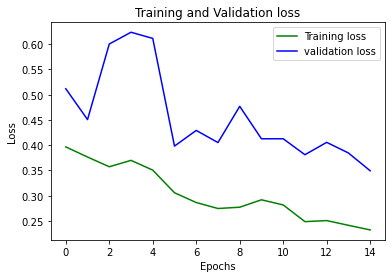

In [96]:
import matplotlib.pyplot as plt
his = tf.keras.callbacks.History()


loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(15)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

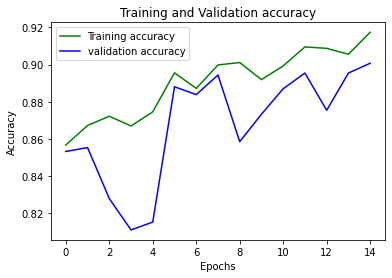

In [97]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(15)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

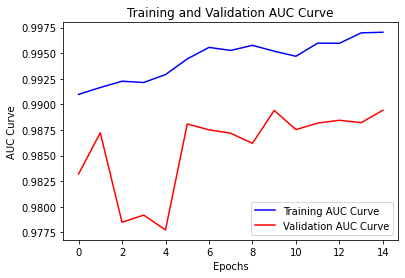

In [98]:
auc_train = history.history['auc']
auc_val = history.history['val_auc']
epochs = range(15)
plt.plot(epochs, auc_train, 'b', label='Training AUC Curve')
plt.plot(epochs, auc_val, 'r', label='Validation AUC Curve')
plt.title('Training and Validation AUC Curve')
plt.xlabel('Epochs')
plt.ylabel('AUC Curve')
plt.legend()
plt.show()

In [100]:
model.evaluate(validation_generator)

30/30 [==============================] - 26s 858ms/step - loss: 0.3673 - accuracy: 0.8976 - auc: 0.9882 - precision: 0.9057 - recall: 0.8923


[0.36734163761138916,
 0.8975712656974792,
 0.9882236123085022,
 0.9056805968284607,
 0.8922914266586304]

In [101]:
validation_generator.reset() 

In [102]:
pred= model.predict_generator(validation_generator, 947  // 32)
predicted_class_indices=np.argmax(pred,axis=1)
labels=(validation_generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print(labels)
print(predictions)

Instructions for updating:
Please use Model.predict, which supports generators.
[ 0  6  4  0  0  6  6  0  6  6  6  6  6  4  0  0  6  0  0  6  6  6  0  0
  6  4  4  0  0  6  6  6  0  6  4  6  0  8  6  6  6  6  0  6  0  6  0  0
  0  6  0  6  1  1  1  1  1  1  1  1  1 11  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  1  1  1  2  5  2  2  2  2  8  2  2  2  2  5  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  8  2  2  2
  2  2  4  2  2  2  2  2  2  2  2  2  1  2  2  2  2  2  2  3  3  3  3  3
  3  3  9 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  0  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  8  3  3  3  3  3  3  3  3  3  3  3  3  8  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [104]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 20   0   0   0   2   0  28   0   2   0   0   0]
 [  0  74   1   0   0   1   0   0   0   0   1   1]
 [  0   2  50   2   0   1   0   0   2   0   0   0]
 [  1   0   0 114   0   0   0   0   2   2   2   1]
 [  3   0   0   0  39   0   1   0   0   0   0   1]
 [  0   0   0   1   1  90   1   0   0   1   0   1]
 [  9   0   0   1   1   0 116   0   3   0   0   0]
 [  0   0   0   0   0   0   1  41   1   0   0   1]
 [  0   0   0   0   0   1   0   0 101   1   0   0]
 [  0   1   0   2   0   0   0   0   2  40   1   0]
 [  0   0   0   0   1   2   0   0   0   0  96   0]
 [  0   0   3   0   0   0   1   0   0   0   1  72]]
Classification Report
                           precision    recall  f1-score   support

              Black-grass       0.61      0.38      0.47        52
                 Charlock       0.96      0.95      0.95        78
                 Cleavers       0.93      0.88      0.90        57
         Common Chickweed       0.95      0.93      0.94       122
            

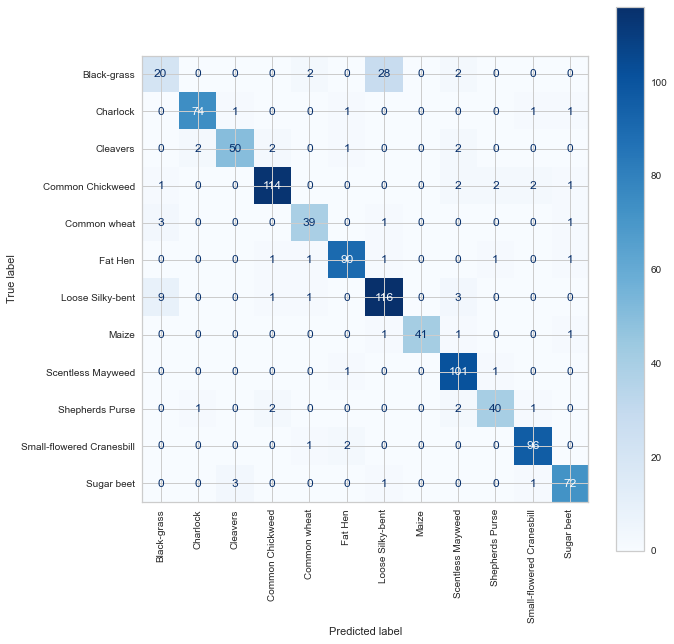

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ['Black-grass','Charlock','Cleavers','Common Chickweed','Common wheat','Fat Hen','Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


cm = confusion_matrix(validation_generator.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10,10))

disp.plot(cmap=plt.cm.Blues,ax=ax, xticks_rotation='vertical')

plt.show()

In [127]:
from tensorflow.keras.models import load_model

model.save('Alexnet-Acc.90-improvement.h5')